In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Confidence intervals

## Using the normal distribution

In [27]:
# Video example: Blood glucose levels.

n = 56   # Sample size.
mu = 135 # Sample mean.
sd = 25  # **Population** standard deviation.

diabetes = 140 # Diagnostic threshold.
error = diabetes - mu

In [28]:
# What's the probability that the population mean is within 135 +/- 5?
z = error / (sd / np.sqrt(n))
print('Z', z)

p = 1 - 2 * stats.norm.cdf(-z)

print('P', p)

# Alternatively, we can avoid computing the z score (let SciPy do the scaling).
p = 1 - 2 * stats.norm.cdf(mu - error, loc=mu, scale=sd / np.sqrt(n))

print('P', p)

# And from here we could get z using SciPy functions.
z = stats.norm.interval(p)[1]
print('Z', z)

# Also, the probability may represent the chances of NOT being in the interval.
print('P', 1 - p)

Z 1.4966629547095767
P 0.8655190198561848
P 0.8655190198561848
Z 1.4966629547095764
P 0.13448098014381515


In [29]:
# What's the probability that the person is diabetic (population mean above 140)?
p = stats.norm.cdf(-z)

print(p)

# Alternatively, we can avoid computing the z score (let SciPy do the scaling).
p = 1 - stats.norm.cdf(diabetes, loc=mu, scale=sd / np.sqrt(n))

print(p)

0.06724049007190756
0.06724049007190758


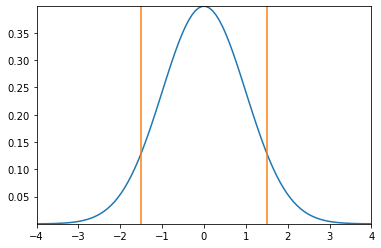

In [30]:
x = np.linspace(-4, 4, 100)

plt.plot(x, stats.norm.pdf(x))
plt.axvline(-z, c='tab:orange')
plt.axvline(z, c='tab:orange')
plt.margins(0)

plt.show()

In [31]:
# What's the interval that contains the population mean with 95% confidence?
confidence = 0.95

z = stats.norm.interval(confidence)[1]
print(z)

error = z * sd / np.sqrt(n)
print('The population mean is %d +/- %.2f with %d%% confidence.' % (mu, error, confidence * 100))

# Alternatively, we can avoid computing the z score (let SciPy do the scaling).
error = stats.norm.interval(confidence, scale = sd / np.sqrt(n))[1]
print('The population mean is %d +/- %.2f with %d%% confidence.' % (mu, error, confidence * 100))

lower, upper = stats.norm.interval(confidence, loc=mu, scale=sd / np.sqrt(n))
print('The population mean is between %.2f and %.2f with %d%% confidence.' % (lower, upper, confidence * 100))

1.959963984540054
The population mean is 135 +/- 6.55 with 95% confidence.
The population mean is 135 +/- 6.55 with 95% confidence.
The population mean is between 128.45 and 141.55 with 95% confidence.


## Using the t distribution
More conservative than the normal for small sample sizes. Virtually equivalent to the normal for big sample sizes (but still better).

In [7]:
# Video example: Blood glucose levels.

n = 56   # Sample size.
mu = 135 # Sample mean.
sd = 25  # Sample standard deviation.
sd = np.sqrt(sd**2 * n / (n - 1)) # With Bessel's correction.

diabetes = 140 # Diagnostic threshold.
error = diabetes - mu

In [8]:
# What's the probability that the population mean is within 135 +/- 5?
t = error / (sd / np.sqrt(n))
print('T', t)

p = 1 - 2 * stats.t.cdf(-t, n - 1)

print('P', p)

# Alternatively, we can avoid computing the z score (let SciPy do the scaling).
p = 1 - 2 * stats.t.cdf(mu - error, n - 1, loc=mu, scale=sd / np.sqrt(n))

print('P', p)

# And from here we could get z using SciPy functions.
t = stats.t.interval(p, n - 1)[1]
print('T', t)

# Also, the probability may represent the chances of NOT being in the interval.
print('P', 1 - p)

T 1.4832396974191326
P 0.8562811761571746
P 0.8562811761571746
T 1.4832396972121291
P 0.14371882384282542


In [9]:
# What's the probability that the person is diabetic (population mean above 140)?
p = stats.t.cdf(-t, n - 1)

print(p)

# Alternatively, we can avoid computing the t score (let SciPy do the scaling).
p = stats.t.cdf(mu - error, n - 1, loc=mu, scale=sd / np.sqrt(n))

print(p)

0.07185941194882726
0.07185941192141272


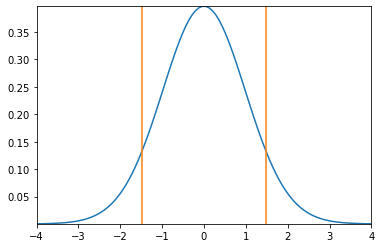

In [10]:
x = np.linspace(-4, 4, 100)

plt.plot(x, stats.t.pdf(x, n - 1))
plt.axvline(-t, c='tab:orange')
plt.axvline(t, c='tab:orange')
plt.margins(0)

plt.show()

In [11]:
# What's the interval that contains the population mean with 95% confidence?
confidence = 0.95

t = stats.t.interval(confidence, n - 1)[1]
print(t)

error = t * sd / np.sqrt(n)
print('The population mean is %d +/- %.2f with %d%% confidence.' % (mu, error, confidence * 100))

# Alternatively, we can avoid computing the t score (let SciPy do the scaling).
error = stats.t.interval(confidence, n - 1, scale = sd / np.sqrt(n))[1]
print('The population mean is %d +/- %.2f with %d%% confidence.' % (mu, error, confidence * 100))

lower, upper = stats.t.interval(confidence, n - 1, loc=mu, scale=sd / np.sqrt(n))
print('The population mean is between %.2f and %.2f with %d%% confidence.' % (lower, upper, confidence * 100))

2.004044781810181
The population mean is 135 +/- 6.76 with 95% confidence.
The population mean is 135 +/- 6.76 with 95% confidence.
The population mean is between 128.24 and 141.76 with 95% confidence.


### Differences between using normal _vs_ t, with or without Bessel's correction, are very small.

## Minimum sample size

In [12]:
# We need to use a normal distribution, because we don't have the degrees of freedom!
def min_sample_size(error, confidence, std):
    import scipy.stats
    z = scipy.stats.norm.interval(confidence)[1]
    
    n = (z * std / error)**2
    
    return n

# Video example.
min_sample_size(10, 0.95, 24)

22.12680280719816

# Statistical significance and p-values
- The p-value is the probability that the null hypothesis is true.
- The p-value is the probability that the differences we observe are only due to chance.

The differences between two samples (or one sample and one reference point) are **statistically significant** if the p-value of a statistical test is below a certain significance threshold (typically $p < 0.05$). This does not mean that the differences are large or meaningful, it just means there are differences, at all.

In [195]:
n = 56   # Sample size.
mu = 135 # Sample mean.
sd = 25  # Sample standard deviation.
sd = np.sqrt(sd**2 * n / (n - 1)) # With Bessel's correction.

diabetes = 140 # Diagnostic threshold.
error = diabetes - mu

# What's the probability that the person is diabetic (population mean above 140)?
t = error / (sd / np.sqrt(n))
p = 1 - stats.t.cdf(t, n - 1)

print(p)

# Alternatively, we can avoid computing the t score (let SciPy do the scaling).
p = 1 - stats.t.cdf(diabetes, n - 1, loc=mu, scale=sd / np.sqrt(n))

print(p)

0.07185941192141265
0.9281405880785873


In [192]:
stats.ttest_1samp(stats.norm.rvs(loc=mu, scale=sd, size=n), diabetes).pvalue / 2

0.1333777366238743

## Comment on Knowledge Check 2, Q3 and Q4

### Q3. Confidence intervals

We first start defining our variables. I'll call old to the control group and new to the treatment group. n is the number of user in the group, mu is the mean number of minutes per month per customer, and sd is its standard deviation:

In [33]:
n_old = 700
mu_old = 163
sd_old = 85

n_new = 850
mu_new = 227
sd_new = 135

Very quickly, we can get the difference in means between the old and new plans:

In [34]:
mu_diff = mu_new - mu_old

But is this difference significant? We can compute the standard error of that difference using the formula given in the video (let's make sure we convert the standard deviations to variances in order to do that):

In [35]:
se = np.sqrt(sd_old**2 / n_old + sd_new**2 / n_new)

Now, our margin of error is this standard error times the desired z-multiplier. In this case, we know that a confidence of 95% corresponds to a multiplier of about 1.96:

In [36]:
error = 1.96 * se
print(mu_diff, error)

64 11.046231191198732


We could instead let SciPy compute the unrounded, more precise value of the z-multiplier instead of using the table-like, rounded version, for a slightly more accurate result:

In [37]:
error = stats.norm.interval(0.95, scale=se)[1]
print(mu_diff, error)

64 11.046028214108416


With either of these solutions we can get an estimate of the difference in means together with its corresponding 95% confidence interval.

#### If we want to be extra nitpicky (which is beyond the question)

Up to now, we have assumed that the reported standard deviations are the population ones, but what happens if we only have the sample standard deviations? We can convert them to estimates of the population standard deviations by applying the Bessel's correction. Here I'm converting the standard deviation to variance, then applying the correction, then back to standard deviation again:

In [38]:
def bc(sd, n):
    '''Convert the sample standard deviation to an estimate of the population standard deviation.'''
    return np.sqrt(sd**2 * n / (n - 1))

We can apply this function to the standard deviations when we compute the standard error as we did before:

In [39]:
se = np.sqrt(bc(sd_old, n_old)**2 / n_old + bc(sd_new, n_new)**2 / n_new)

But now our estimate is not normally distributed (we don't have an infinite sample size) but t distributed instead, so we can use the t-multiplier from either the corresponding table or let SciPy do the heavy lifting:

In [40]:
error = stats.t.interval(0.95, n_old + n_new - 1, scale=se)[1]
print(mu_diff, error)

64 11.061628244712692


In this last example, we see that the margin of error is slightly bigger than the one reported in the question, so we know the question was assuming we would use the normal distribution to compute the confidence intervals!

### Q4. Statistical significance 

Now, if we want to know if the difference between groups is statistically significant, we may ask: are the means really different from each other? Or alternatively: is the difference between means really different from 0? Same thing.

We will thus look whether the confidence interval (mu_diff - error, mu_diff + error) contains 0 or not. If it doesn't, we will conclude that the differences are statistically significant with a p-value < 0.05. We could repeat the confidente interval calculation above for the 90% confidence interval, to check for significance at a threshold of p-value < 0.10, but we already know that if something has a p-value < 0.05, it follows that the p-value is already lower than 0.10, right?

## In practice
We are given actual samples, not just statistics.

In [66]:
np.random.seed(2)

control = stats.norm.rvs(loc=-1, size=8)
treatment = stats.norm.rvs(loc=-1.5, size=9)

# Add a dataset to do ttest (2 and 1 sample maybe).

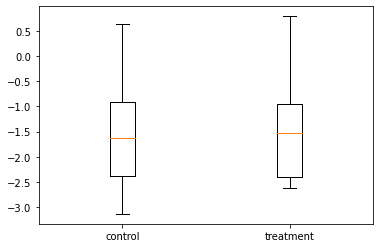

In [67]:
plt.boxplot([control, treatment], labels=['control', 'treatment'])

plt.show()

In [68]:
stats.ttest_1samp(treatment, 0)

Ttest_1sampResult(statistic=-4.2377575915291, pvalue=0.002846142960474799)

In [69]:
stats.ttest_ind(control, treatment)

Ttest_indResult(statistic=-0.022456788804293085, pvalue=0.9823795955200982)